[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thomasmanke/ABS/blob/main/Notebooks/MarkovChains/MC_001.ipynb)

# Markov Chain Applications



Applications:
- Models for real processes (weather, games, sequences, ...)
- Hidden Markov Models (unobservable states)
- Construct processes that converge to desired distributions $\pi$ (MCMC) 


# Load Tools

In [ ]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt

def plot_transition_matrix(P, tmax=100):

  # some sanity checks
  assert P.shape[0]==P.shape[1],         "P should be a squared matrix"
  assert np.allclose( P.sum(axis=1), 1), "P should be a stochastic matrix"

  fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(10,5))
  i=0
  for t in [0,1,2,10,tmax]:
    S=matrix_power(P,t)
    im=ax[i].imshow(S, cmap=plt.cm.Blues)
    ax[i].set_title(t)
    i = i + 1
  cax = fig.add_axes([0.1, 0.2, 0.8, 0.05])
  fig.colorbar(im, cax=cax, orientation='horizontal')
  plt.show()

# Google PageRank

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/MC_PageRank.jpg",  align=left width="1000">
</div>

**Goal:** rank web pages (containing a search word) by importance

**Problem:** number of links is not a good measure of importance (fake sites with millions of links)

$$
k_j = \sum_i L_{ji}
$$


**Normalization:** 
link weights $P_{ji}$ are normalized by the outdegree $k_j$ of neighbouring node $j$

$$
P_{ji} = \frac{L_{ji}}{ k_j }
$$



**Recursion Idea:** Important pages are pointed to by many important pages

$$
\pi_i = \sum_j \pi_j P_{ji}
$$


Todo: add figure with original links, bare Markov chain, and corrected Markov chain 


**A small modification:** add weak self-links and links where data is missing.
This will make the matrix irreducible and aperiodic


$$
L \to P \to \tilde{P} = \frac{\epsilon}{N} + (1-\epsilon) P
$$


Notice that $\tilde{P}$ is also Markov (stochastic)

$$
\sum_{j=1}^N \tilde{P}_{ij} = \epsilon + (1 - \epsilon) \sum_{j=1}^N P_{ij} = \epsilon + ( 1 - \epsilon) = 1
$$





**Group Task (30 min):** Solving Google PageRank.

Use the Markov Properties of the (modified) weight matrix to rank the nodes of the small illustrated network by their importance.

Larry Page suggested to use: $\epsilon=0.15$. 

In [ ]:
%%script echo edit before executiton
L= ...
ns=
print('number of states: ', ns)

# convert link matrix to transition probabilities
P = L/L.sum(axis=1, keepdims=True) 
print('P:\n', P)
print('rowsum(P):', P.sum(axis=1))

# adjust transition matrix
eps= ...
Padj = ...
print('Padj:\n', Padj)
print('rowsum(Padj):', Padj.sum(axis=1))

plot_transition_matrix(Padj)

# get stationary distribution
S= ...
print('stationary:\n', ... )

**References:**

- Elements of Statistical Learning (p. 577-578) (up to matrix transposition)
- https://en.wikipedia.org/wiki/PageRank


# Detecting a Loaded Coin (Skip)

Coin flipping corresponds to a Markov chain where the states are the observed heads (0) and tails (1). 

For a fair coin we would expect a transition probability $P_F$ as given below.
And a loaded coin may have a different matrix $P_L$

$$
P_F = \begin{bmatrix} 
0.5   &  0.5 \\ 
0.5   &  0.5
\end{bmatrix} 
~~~
P_L = \begin{bmatrix} 
0.8   &  0.2 \\ 
0.8   &  0.2 
\end{bmatrix} 
$$

Let's assume that these parameters have been determined by previous observations.

**Question:** Given an observed sequence $X$ of coin tosses, is it more likely obtained from a fair or loaded coin.

$$
S = \frac{Pr(P_L|X)}{Pr(P_F|X)}  <> 1 ?
$$

**Bayesian Argument:** Data update prior beliefs.

$$
\log \frac{Pr(P_L|X)}{Pr(P_F|X)}  = \log \frac{Pr(X|P_L)}{Pr(X|P_F)} \frac{Pr(P_L)}{Pr(P_F)}
$$


**Notice:**

$P(X|P_L)$ and $P(X|P_F)$ can be calculated as discussed in the previous section 

The logarithm is convenient and converts the product of probabilities into a sum of their logs.

This classification also depends on the relative abundance of fair and loaded coins, i.e their prior probabilities $Pr(P_F)$ and $Pr(P_L)$.



**Task: (10 min)** Given the two coin models above (fair and loaded) and a coin sequence $HHTTTHH$ calculate the score and given an interpretation.
For simplicity you may assume that the prior probabilities are identical.

In [ ]:
P_F = np.array( [[0.5, 0.5], [0.5, 0.5]] )
P_L = np.array( [[0.8, 0.2], [0.8, 0.2]] )
S   = [0,0,1,1,1,0,0]
T   = ...

score = ...                    
for t in range(T):
    x1=...                   # current state
    x2=...                 # next state
    score = ...   
    print('t={}, x1={}, x2={} P[s1,s2]={} {}'.format(t,x1,x2, P_L[x1,x2], P_F[x1,x2] ))

print('score:', score)

t=0, x1=0, x2=0 P[s1,s2]=0.8 0.5
t=1, x1=0, x2=1 P[s1,s2]=0.2 0.5
t=2, x1=1, x2=1 P[s1,s2]=0.2 0.5
t=3, x1=1, x2=1 P[s1,s2]=0.2 0.5
t=4, x1=1, x2=0 P[s1,s2]=0.8 0.5
t=5, x1=0, x2=0 P[s1,s2]=0.8 0.5
score: -1.3388613078852583


# Famous Markov Chains

## Random Walk


<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/MC_RandomWalk.png",  align=left width="1000">
</div>

**Discussion:** What would the transition matrix look like?

$p+q=1$

- $p<1/2$: all states positive recurrent
- $p=1/2$: all states null recurrent
- $p>1/2$: all states transient

## Drunkard's Walk

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/drunkards_walk.png",  align=left width="1000">
</div>

**Task (15 min):**

Write down the transition matrix and calculate the probabilities for each starting state that the drunkard will reach home

## Cat & Mouse





**Group Task (15 min):**

A mouse walks randomly around a house - with 5 connected rooms (see figure).
At each time step the mouse will with equal probability stay in the room or walk through one of the doors.
In Room 2 there is some cheese, so she'll never leave.
In room 5 sits a hungry cat (who doesn't move) - but that would also be the end for our mouse.

1. Define the corresponding Markov Model and its transition matrix.
2. Assume that the mouse starts in room 1, what are the probabilities to find her in the various rooms after 5 time steps
3. Determine for each starting room the probabilities of the mouse ultimately reaching the cheese.

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/MC_CatMouse.jpg",  align=left width="200">
</div>

We interprete the following Markov chain as a game with two end states (loss 0, win 4)

$$
P = \begin{bmatrix} 
0   &  1/2 & 1/2  & 0   & 0\\ 
0   &   1  & 0    & 0   & 0 \\ 
1/2 &   0  & 0    & 1/2 & 0 \\
0   &  1/3 & 1/3  & 0   & 1/3 \\
0   &   0  & 0    & 0   & 1 
\end{bmatrix} 
$$

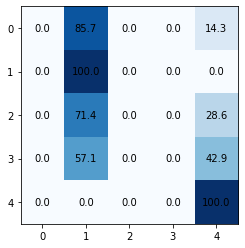

In [ ]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt

P = ...

...

# some helper function to visualize a matrix S of probabilities
# show matrix with rounded percentages added as text
fig, ax = plt.subplots()
im = ax.imshow(S, cmap=plt.cm.Blues)
for i in range(5):
  for j in range(5):
    text = ax.text(j, i, np.round(100*S[i, j],1),
                   ha="center", va="center", color="black")

# Sequence Evolution: Jukes-Cantor

The evolution of DNA sequences can be modeled as a Markov process with substitution rate $\alpha$.

State space: A=0, C=1, G=2, T=3.

The transition matrix can be written as

$$
P = \begin{bmatrix} 
\delta   &  \alpha & \alpha  & \alpha   \\ 
\alpha   &  \delta & \alpha  & \alpha    \\ 
\alpha   &  \alpha & \delta  & \alpha    \\ 
\alpha   &  \alpha & \alpha  & \delta    \\ 
\end{bmatrix} 
$$

**Group task (20 min):** 

For $P$ to be Markov what is the value for $\delta$?

What is the stationary distribution? Does it depend on $\alpha$?

Assuming an original nucleotide A in some sequence at time t=0. According to the Markov model what is the probability to observe nucleotide A (or some other nucleotide X) in an evolved sequence at time $t$).

2 evolved sequences: Consider an alignment of two derived sequences. The ancestoral sequence had nucleotide "A" as some position. What is the probability of observing the nucleotides "C-G" in the alignment at this position.  

In [ ]:
# chose a and d sensibly
a=...
d=...
P=np.array([[d,a,a,a],
            [a,d,a,a],
            [a,a,d,a],
            [a,a,a,d]])

AA = []
AX = []
GC = []
for t in range(20):
  [ ... calculate probabilites ... ]

  [ ... and append them to the lists ...]
  AA.append(...)
  AX.append(...)
  GC.append(...)

# plot
plt.plot(AA)
plt.plot(AX)
plt.plot(GC)
plt.show()

**Notice:** 

There are many extensions of the simple substitution model, that can account for different rates $A\to G$ vs $A\to C,T$ and for non-uniform stationary distribution.